For today remedial test, We would use the 1985 automotive import data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Like usual, just read the data first

In [2]:
df =pd.read_csv('auto_imports.csv')

In [3]:
df.head()

,Symboling,Normalized-Loss,Make,Fuel-Type,Aspiration,Num-of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,...,Engine-Size,Fuel-System,Bore,Stroke,Compression-ratio,Horsepower,Peak-rpm,City-MPG,Highway-MPG,Price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
Symboling            201 non-null int64
Normalized-Loss      201 non-null object
Make                 201 non-null object
Fuel-Type            201 non-null object
Aspiration           201 non-null object
Num-of-Doors         201 non-null object
Body-Style           201 non-null object
Drive-Wheels         201 non-null object
Engine-Location      201 non-null object
Wheel-Base           201 non-null float64
Length               201 non-null float64
Width                201 non-null float64
Height               201 non-null float64
Curb-Weight          201 non-null int64
Engine-Type          201 non-null object
Cylinders            201 non-null object
Engine-Size          201 non-null int64
Fuel-System          201 non-null object
Bore                 201 non-null object
Stroke               201 non-null object
Compression-ratio    201 non-null float64
Horsepower           201 non-nul

In [5]:
df.describe()

,Symboling,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Size,Compression-ratio,City-MPG,Highway-MPG,Price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,10.164279,25.179104,30.686567,13207.129353
std,1.254802,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,4.004965,6.423220,6.815150,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,8.600000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,9.400000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


In [6]:
df.describe(exclude='number')

,Normalized-Loss,Make,Fuel-Type,Aspiration,Num-of-Doors,Body-Style,Drive-Wheels,Engine-Location,Engine-Type,Cylinders,Fuel-System,Bore,Stroke,Horsepower,Peak-rpm
count,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201
unique,52,22,2,2,3,5,3,2,6,7,8,39,37,59,23
top,?,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,3.4,68,4800
freq,37,32,181,165,113,94,118,198,145,157,92,23,19,19,36


In [7]:
list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(),df[col].isna().sum()/len(df)*100,
                     df[col].nunique(),list(df[col].drop_duplicates().unique()[:2])])

df1 = pd.DataFrame(columns=['dataFeatures','dataType','null','nullPCT','unique','uniqueSample'],
                  data=list_item)
df1

,dataFeatures,dataType,null,nullPCT,unique,uniqueSample
0,Symboling,int64,0,0.0,6,"[3, 1]"
1,Normalized-Loss,object,0,0.0,52,"[?, 164]"
2,Make,object,0,0.0,22,"[alfa-romero, audi]"
3,Fuel-Type,object,0,0.0,2,"[gas, diesel]"
4,Aspiration,object,0,0.0,2,"[std, turbo]"
5,Num-of-Doors,object,0,0.0,3,"[two, four]"
6,Body-Style,object,0,0.0,5,"[convertible, hatchback]"
7,Drive-Wheels,object,0,0.0,3,"[rwd, fwd]"
8,Engine-Location,object,0,0.0,2,"[front, rear]"
9,Wheel-Base,float64,0,0.0,52,"[88.6, 94.5]"


If you realize, some columns that are numerical is listed as object data type. This is because in the data there is "?" value that become the placeholder of Null value. Now replace all the "?" in every columns as NaN value (np.nan).

In [8]:
for i in df.columns:
    for j in df[i]:
        if j == "?" :
            df[i] = df[i].replace("?",np.nan)
        else:
            j
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
Symboling            201 non-null int64
Normalized-Loss      164 non-null object
Make                 201 non-null object
Fuel-Type            201 non-null object
Aspiration           201 non-null object
Num-of-Doors         199 non-null object
Body-Style           201 non-null object
Drive-Wheels         201 non-null object
Engine-Location      201 non-null object
Wheel-Base           201 non-null float64
Length               201 non-null float64
Width                201 non-null float64
Height               201 non-null float64
Curb-Weight          201 non-null int64
Engine-Type          201 non-null object
Cylinders            201 non-null object
Engine-Size          201 non-null int64
Fuel-System          201 non-null object
Bore                 197 non-null object
Stroke               197 non-null object
Compression-ratio    201 non-null float64
Horsepower           199 non-nul

In [9]:
pd.DataFrame({
    'dataFeatures' : df.columns,
    'dataType' : [df[i].dtype for i in df.columns],
    'null' : [df[i].isna().sum() for i in df.columns],
    'nullPCT' : [df[i].isna().sum()/len(df)*100 for i in df.columns],
    'unique' : [df[i].nunique() for i in df.columns],
    'uniqueSample' : [list(df[i].drop_duplicates().unique()[:2]) for i in df.columns]
})

,dataFeatures,dataType,null,nullPCT,unique,uniqueSample
0,Symboling,int64,0,0.000000,6,"[3, 1]"
1,Normalized-Loss,object,37,18.407960,51,"[nan, 164]"
2,Make,object,0,0.000000,22,"[alfa-romero, audi]"
3,Fuel-Type,object,0,0.000000,2,"[gas, diesel]"
4,Aspiration,object,0,0.000000,2,"[std, turbo]"
5,Num-of-Doors,object,2,0.995025,2,"[two, four]"
6,Body-Style,object,0,0.000000,5,"[convertible, hatchback]"
7,Drive-Wheels,object,0,0.000000,3,"[rwd, fwd]"
8,Engine-Location,object,0,0.000000,2,"[front, rear]"
9,Wheel-Base,float64,0,0.000000,52,"[88.6, 94.5]"


There are 2 columns that would be nice if they are represented as numerical value rather than written; Num-of_Doors and Cylinders. For this 2 columns, replace the string as numerical value (Ex : if it is two then replace it with 2, etc)     

In [10]:
df['Cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [11]:
angka = {'two': 2,'three': 3,'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12}     

In [12]:
df = df.replace({'Num-of-Doors':angka})
df = df.replace({'Cylinders':angka})

In [13]:
df['Num-of-Doors'].unique()

array([2, 4, nan], dtype=object)

In [14]:
df['Cylinders'].unique()

array([ 4,  6,  5,  3, 12,  2,  8], dtype=int64)

Now Convert these following columns into float object:

- Num-of-Doors
- Cylinders
- Bore
- Stroke
- Horsepower
- Peak-rpm

In [15]:
df['Num-of-Doors'] = df['Num-of-Doors'].astype(float)
df['Cylinders'] = df['Cylinders'].astype(float)
df['Bore'] = df['Bore'].astype(float)
df['Stroke'] = df['Stroke'].astype(float)
df['Horsepower'] = df['Horsepower'].astype(float)
df['Peak-rpm'] = df['Peak-rpm'].astype(float)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
Symboling            201 non-null int64
Normalized-Loss      164 non-null object
Make                 201 non-null object
Fuel-Type            201 non-null object
Aspiration           201 non-null object
Num-of-Doors         199 non-null float64
Body-Style           201 non-null object
Drive-Wheels         201 non-null object
Engine-Location      201 non-null object
Wheel-Base           201 non-null float64
Length               201 non-null float64
Width                201 non-null float64
Height               201 non-null float64
Curb-Weight          201 non-null int64
Engine-Type          201 non-null object
Cylinders            201 non-null float64
Engine-Size          201 non-null int64
Fuel-System          201 non-null object
Bore                 197 non-null float64
Stroke               197 non-null float64
Compression-ratio    201 non-null float64
Horsepower           199 non

We do not need Symboling and Normalized Columns, so drop these 2 columns. Then, filter the data to acquire the only the row that contain NaN

In [17]:
df.drop(['Symboling','Normalized-Loss'],axis=1, inplace=True)

In [18]:
df1 = df[df.isna().any(axis=1)]
df1

,Make,Fuel-Type,Aspiration,Num-of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,...,Engine-Size,Fuel-System,Bore,Stroke,Compression-ratio,Horsepower,Peak-rpm,City-MPG,Highway-MPG,Price
26,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,157.3,63.8,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558
52,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,10945
53,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,11845
54,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645
55,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,...,80,mpfi,NaN,NaN,9.4,135.0,6000.0,16,23,15645
60,mazda,diesel,std,NaN,sedan,fwd,front,98.8,177.8,66.5,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795
126,renault,gas,std,4.0,wagon,fwd,front,96.1,181.5,66.5,...,132,mpfi,3.46,3.90,8.7,NaN,NaN,23,31,9295
127,renault,gas,std,2.0,hatchback,fwd,front,96.1,176.8,66.6,...,132,mpfi,3.46,3.90,8.7,NaN,NaN,23,31,9895



Now we will try to fill the NaN value for some of the columns. For the NaN in Num-of-Doors, Bore, and Stroke columns fill the NaN value with the mean of their columns with the similar value in the Make and Body-Style columns. *e.g if you have NaN in num-of-doors with hatchback renault car then fill the NaN with the num-of-doors mean of the hatchback renault car. 

In [19]:
indeks = []
for row in df1.index: 
    indeks.append(row) 

In [20]:
for col in df.columns:
    for i in indeks:
        if pd.isna(df.loc[i,col]):
            df.loc[i,col] = df.groupby(by=['Body-Style','Make']).mean().loc[df.loc[i,'Body-Style'],df.loc[i,'Make']][col]
df.loc[indeks]

,Make,Fuel-Type,Aspiration,Num-of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,...,Engine-Size,Fuel-System,Bore,Stroke,Compression-ratio,Horsepower,Peak-rpm,City-MPG,Highway-MPG,Price
26,dodge,gas,turbo,4.0,sedan,fwd,front,93.7,157.3,63.8,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558
52,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,...,70,4bbl,3.21,3.27,9.4,101.0,6000.0,17,23,10945
53,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,...,70,4bbl,3.21,3.27,9.4,101.0,6000.0,17,23,11845
54,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,...,70,4bbl,3.21,3.27,9.4,101.0,6000.0,17,23,13645
55,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,...,80,mpfi,3.21,3.27,9.4,135.0,6000.0,16,23,15645
60,mazda,diesel,std,4.0,sedan,fwd,front,98.8,177.8,66.5,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795
126,renault,gas,std,4.0,wagon,fwd,front,96.1,181.5,66.5,...,132,mpfi,3.46,3.90,8.7,NaN,NaN,23,31,9295
127,renault,gas,std,2.0,hatchback,fwd,front,96.1,176.8,66.6,...,132,mpfi,3.46,3.90,8.7,NaN,NaN,23,31,9895


Let's see once more our previous dataframe which contain the NaN to make sure that it have been filled properly

In [21]:
df.loc[indeks]

,Make,Fuel-Type,Aspiration,Num-of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,...,Engine-Size,Fuel-System,Bore,Stroke,Compression-ratio,Horsepower,Peak-rpm,City-MPG,Highway-MPG,Price
26,dodge,gas,turbo,4.0,sedan,fwd,front,93.7,157.3,63.8,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558
52,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,...,70,4bbl,3.21,3.27,9.4,101.0,6000.0,17,23,10945
53,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,...,70,4bbl,3.21,3.27,9.4,101.0,6000.0,17,23,11845
54,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,...,70,4bbl,3.21,3.27,9.4,101.0,6000.0,17,23,13645
55,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,...,80,mpfi,3.21,3.27,9.4,135.0,6000.0,16,23,15645
60,mazda,diesel,std,4.0,sedan,fwd,front,98.8,177.8,66.5,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795
126,renault,gas,std,4.0,wagon,fwd,front,96.1,181.5,66.5,...,132,mpfi,3.46,3.90,8.7,NaN,NaN,23,31,9295
127,renault,gas,std,2.0,hatchback,fwd,front,96.1,176.8,66.6,...,132,mpfi,3.46,3.90,8.7,NaN,NaN,23,31,9895


Now, drop all the rest row that contain the NaN value

In [22]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 200
Data columns (total 24 columns):
Make                 199 non-null object
Fuel-Type            199 non-null object
Aspiration           199 non-null object
Num-of-Doors         199 non-null float64
Body-Style           199 non-null object
Drive-Wheels         199 non-null object
Engine-Location      199 non-null object
Wheel-Base           199 non-null float64
Length               199 non-null float64
Width                199 non-null float64
Height               199 non-null float64
Curb-Weight          199 non-null int64
Engine-Type          199 non-null object
Cylinders            199 non-null float64
Engine-Size          199 non-null int64
Fuel-System          199 non-null object
Bore                 199 non-null float64
Stroke               199 non-null float64
Compression-ratio    199 non-null float64
Horsepower           199 non-null float64
Peak-rpm             199 non-null float64
City-MPG             199 

As I am interested in the car price, I want to see if the brand of the car (Make column) would affecting the price. Let's try to create a visualization of it

Text(0.5, 1.0, 'Countplot of the car brand')

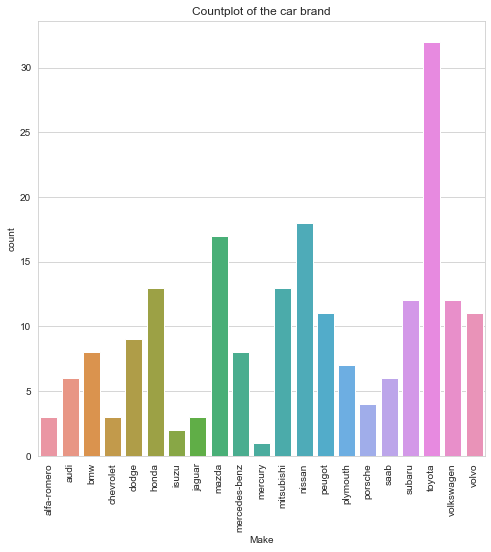

In [23]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,8))
sns.countplot(x='Make', data=df)
plt.xticks(rotation=90)
plt.title('Countplot of the car brand')

Text(0.5, 1.0, 'Mean price of each car brand')

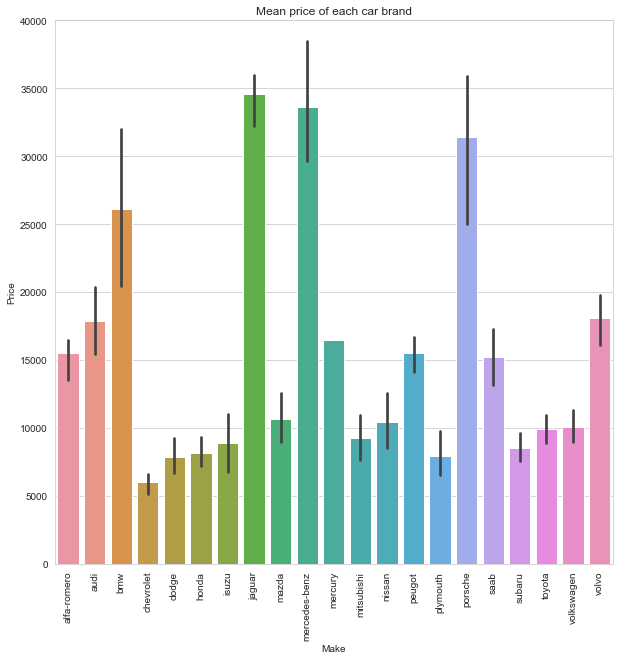

In [24]:
plt.figure(figsize=(10,10))
sns.barplot(x='Make',y='Price', data=df)
plt.ylim([0,40000])
plt.xticks(rotation=90)
plt.title('Mean price of each car brand')

Text(0.5, 1.0, 'Car price distribution for each brand')

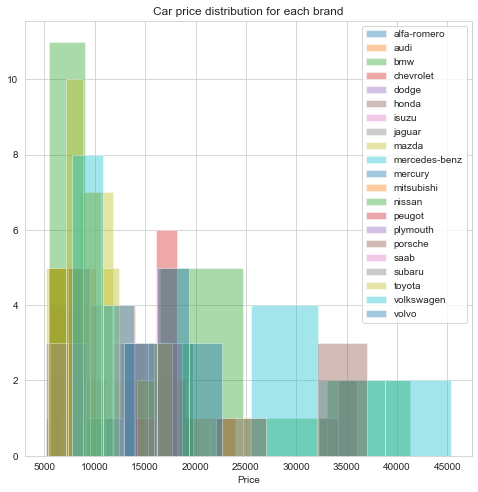

In [25]:
plt.figure(figsize=(8,8))
for i in df['Make'].unique():
    sns.distplot(df[df['Make'] == i]['Price'], kde=False,label=i)
plt.legend()
plt.title('Car price distribution for each brand')

## Question 1
Do you think is a relation between the price column and the Make column ? Make you reasoning

In [26]:
df2 = pd.DataFrame(data = df , columns = ['Make','Price'])

In [27]:
a = df2.groupby('Make').Price.mean()
d = pd.DataFrame(a, columns= ['Price'])
d.sort_values(by=['Price'], inplace=True)

In [28]:
d

,Price
Make,
chevrolet,6007.000000
dodge,7875.444444
plymouth,7963.428571
honda,8184.692308
subaru,8541.250000
isuzu,8916.500000
mitsubishi,9239.769231
toyota,9885.812500
volkswagen,10077.500000


In [29]:
from scipy.stats import shapiro, anderson, skew, kurtosis
nor = []
for i in df['Make'].unique():
    data = df[df['Make']==i]['Price']
    if anderson(data)[1][2] < 0.05:
        nor.append('Not-Normal Distribution')
    else:
        nor.append('Normal Distribution')        

C:\Users\Sabam-Mr\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Sabam-Mr\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Sabam-Mr\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_distn_infrastructure.py:1869: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= _b) & cond0
C:\Users\Sabam-Mr\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_distn_infrastructure.py:1957: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [30]:
res = pd.DataFrame(data = [list(df['Make'].unique()), nor]).T
res.columns = ['Columns', 'Normality test']
res

,Columns,Normality test
0,alfa-romero,Not-Normal Distribution
1,audi,Normal Distribution
2,bmw,Normal Distribution
3,chevrolet,Not-Normal Distribution
4,dodge,Normal Distribution
5,honda,Normal Distribution
6,isuzu,Not-Normal Distribution
7,jaguar,Not-Normal Distribution
8,mazda,Normal Distribution
9,mercedes-benz,Normal Distribution


In [31]:
from pingouin import kruskal
kruskal(data=df, dv='Price', between='Make')

,Source,ddof1,H,p-unc
Kruskal,Make,20,123.295,6.974537e-17


C:\Users\Sabam-Mr\Anaconda3\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.2, the latest is 0.3.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [32]:
df['Make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

[Text(0, 0, 'toyota'),
 Text(0, 0, 'nissan'),
 Text(0, 0, 'mazda'),
 Text(0, 0, 'mitsubishi'),
 Text(0, 0, 'honda'),
 Text(0, 0, 'volkswagen'),
 Text(0, 0, 'subaru'),
 Text(0, 0, 'volvo'),
 Text(0, 0, 'peugot'),
 Text(0, 0, 'dodge')]

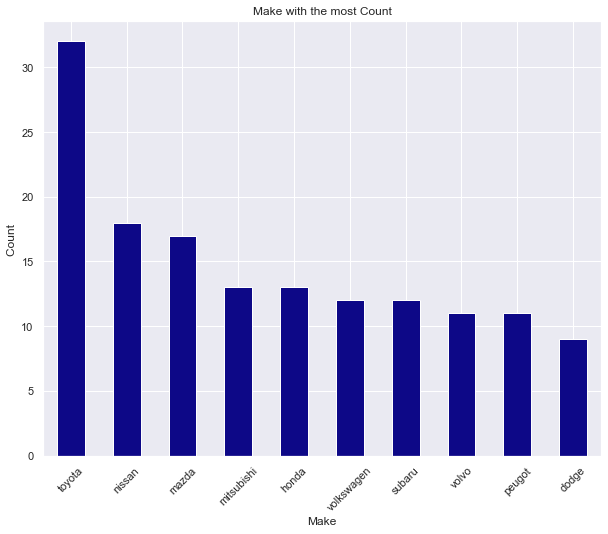

In [33]:
top = df2.Make.value_counts().head(10)
sns.set(rc={'figure.figsize' : (10,8)})
viz_1 = top.plot(kind='bar', cmap='plasma')
viz_1.set_title('Make with the most Count')
viz_1.set_ylabel('Count ')
viz_1.set_xlabel('Make')
viz_1.set_xticklabels(viz_1.get_xticklabels(),rotation =45)

- Berdasarkan dari hasil group-by diatas dapat saya simpulkan bahwa mobil buatan Eropa memiliki Price Lebih tinggi dibanding mobil buatan Asia atau Amerika, dan mobil buatan Eropa yang memiliki Price tertinggi antara lain Jaguar, Mercedes-benz, Porsche, BMW, Volvo.
- Berdasarkan Hasil tes Normalitas dengan Anderson, mayoritas relation antara price dengan make memiliki distribusi normal  
- Berdasarkan hasil bar plot dengan jumlah mobil terbanyak, dapat terlihat mobil buatan Asia (khusus Jepang dan Korea) memiliki jumlah mobil yang paling banyak.
- Menurut Analisa saya produksi mobil buatan Eropa lebih sedikit karena di khususkan untuk kalangan atas dan memiliki harganya yang lebih mahal, sedangkan Mobil buatan Asia di khususkan untuk masyarakat umum (menengah atas dan bawah) dan memiliki harga yang lebih murah
- Berdasarkan tes Kruskal p-unc < 0.05 yang artinya menerima H1 atau price dan Make memiliki relation

Create a new column called MPG-difference where the value is coming from the difference between Highway-MPG and City-MPG, then create another column called Car-Area from multipication of Length, Width, and Height columns.

In [34]:
df['MPG-difference'] = df['Highway-MPG'] - df['City-MPG']

In [35]:
df['Car-Area'] = df['Length'] * df['Width'] * df['Height']

In [36]:
df.head()

,Make,Fuel-Type,Aspiration,Num-of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,...,Bore,Stroke,Compression-ratio,Horsepower,Peak-rpm,City-MPG,Highway-MPG,Price,MPG-difference,Car-Area
0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495,6,528019.904
1,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500,6,528019.904
2,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,171.2,65.5,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500,7,587592.640
3,audi,gas,std,4.0,sedan,fwd,front,99.8,176.6,66.2,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950,6,634816.956
4,audi,gas,std,4.0,sedan,4wd,front,99.4,176.6,66.4,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450,4,636734.832


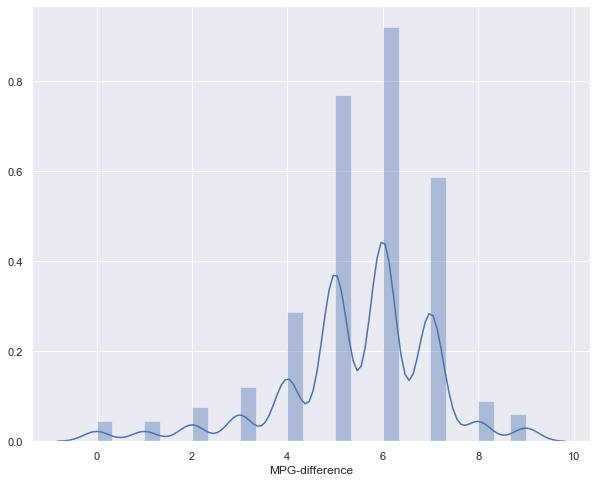

In [37]:
sns.distplot(df['MPG-difference'])

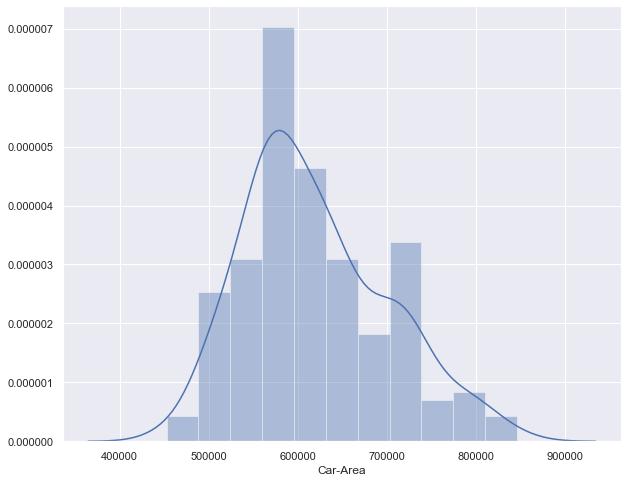

In [38]:
sns.distplot(df['Car-Area'])

Now, use the IQR method to find the row outlier based on the MPG-Difference columns

In [39]:
Q1 = df['MPG-difference'].describe()['25%']
Q3 = df['MPG-difference'].describe()['75%']
IQR = Q3 - Q1
Q1_new = Q1 - (1.5*IQR)
Q3_new = Q3 + (1.5*IQR)

data_row_outlier = df[((df['MPG-difference'] < Q1_new) | (df['MPG-difference']>(Q3_new)))]

In [41]:
data_row_outlier

,Make,Fuel-Type,Aspiration,Num-of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,...,Bore,Stroke,Compression-ratio,Horsepower,Peak-rpm,City-MPG,Highway-MPG,Price,MPG-difference,Car-Area
8,audi,gas,turbo,4.0,sedan,fwd,front,105.8,192.7,71.4,...,3.13,3.40,8.3,140.0,5500.0,17,20,23875,3,769115.802
47,mazda,gas,std,2.0,hatchback,fwd,front,93.1,159.1,64.2,...,3.03,3.15,9.0,68.0,5000.0,30,31,5195,1,552589.302
62,mazda,gas,std,4.0,sedan,rwd,front,104.9,175.0,66.1,...,3.76,3.16,8.0,120.0,5000.0,19,27,18280,8,629272.000
63,mazda,diesel,std,4.0,sedan,rwd,front,104.9,175.0,66.1,...,3.43,3.64,22.0,72.0,4200.0,31,39,18344,8,629272.000
64,mercedes-benz,diesel,turbo,4.0,sedan,rwd,front,110.0,190.9,70.3,...,3.58,3.64,21.5,123.0,4350.0,22,25,25552,3,758245.255
65,mercedes-benz,diesel,turbo,4.0,wagon,rwd,front,110.0,190.9,70.3,...,3.58,3.64,21.5,123.0,4350.0,22,25,28248,3,787769.849
66,mercedes-benz,diesel,turbo,2.0,hardtop,rwd,front,106.7,187.5,70.3,...,3.58,3.64,21.5,123.0,4350.0,22,25,28176,3,723650.625
67,mercedes-benz,diesel,turbo,4.0,sedan,rwd,front,115.6,202.6,71.7,...,3.58,3.64,21.5,123.0,4350.0,22,25,31600,3,817837.446
68,mercedes-benz,gas,std,4.0,sedan,rwd,front,115.6,202.6,71.7,...,3.46,3.10,8.3,155.0,4750.0,16,18,34184,2,820742.730
69,mercedes-benz,gas,std,2.0,convertible,rwd,front,96.6,180.3,70.5,...,3.46,3.10,8.3,155.0,4750.0,16,18,35056,2,645726.420


In [42]:
data_row_outlier.describe()

,Num-of-Doors,Wheel-Base,Length,Width,Height,Curb-Weight,Cylinders,Engine-Size,Bore,Stroke,Compression-ratio,Horsepower,Peak-rpm,City-MPG,Highway-MPG,Price,MPG-difference,Car-Area
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,3.241379,102.193103,180.241379,67.406897,54.551724,2909.896552,5.000000,156.000000,3.465517,3.254483,14.720690,117.448276,4917.241379,24.275862,28.448276,20811.448276,4.172414,666796.701655
std,0.987608,9.094305,13.996671,2.863431,2.301338,616.542163,1.414214,59.221738,0.279676,0.289477,6.748459,47.951304,687.681906,7.449336,8.974512,11905.112919,3.263094,100367.760042
min,2.000000,89.500000,159.100000,64.000000,50.200000,1890.000000,4.000000,91.000000,3.010000,2.640000,7.700000,52.000000,4150.000000,14.000000,16.000000,5195.000000,0.000000,552589.302000
25%,2.000000,95.700000,168.900000,65.000000,52.800000,2300.000000,4.000000,108.000000,3.240000,3.080000,9.000000,73.000000,4500.000000,17.000000,25.000000,9298.000000,2.000000,567911.680000
50%,4.000000,97.300000,175.000000,66.100000,54.900000,2756.000000,4.000000,145.000000,3.580000,3.350000,9.500000,112.000000,4800.000000,23.000000,25.000000,18344.000000,3.000000,629272.000000
75%,4.000000,110.000000,190.900000,70.300000,55.900000,3495.000000,6.000000,183.000000,3.700000,3.400000,21.500000,143.000000,5000.000000,30.000000,31.000000,31600.000000,8.000000,769115.802000
max,4.000000,120.900000,208.100000,72.000000,58.700000,3900.000000,8.000000,308.000000,3.940000,3.640000,23.000000,207.000000,6600.000000,38.000000,47.000000,45400.000000,9.000000,846007.659000


Text(0.5, 1.0, 'Car-Area distribution of the outlier')

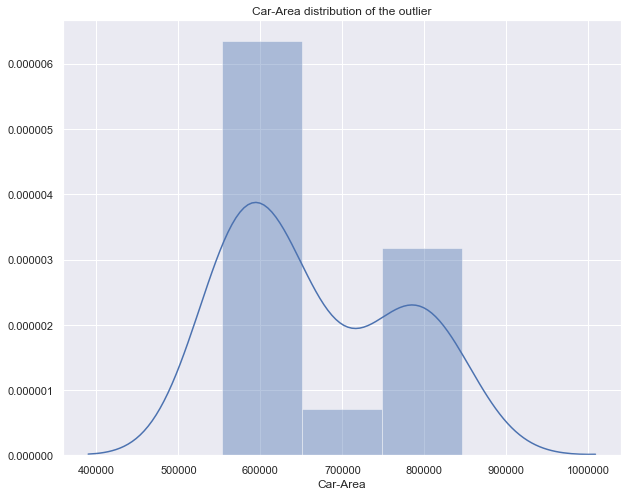

In [43]:
sns.distplot(data_row_outlier['Car-Area'])
plt.title('Car-Area distribution of the outlier')

Text(0.5, 1.0, 'Price distribution of the outlier')

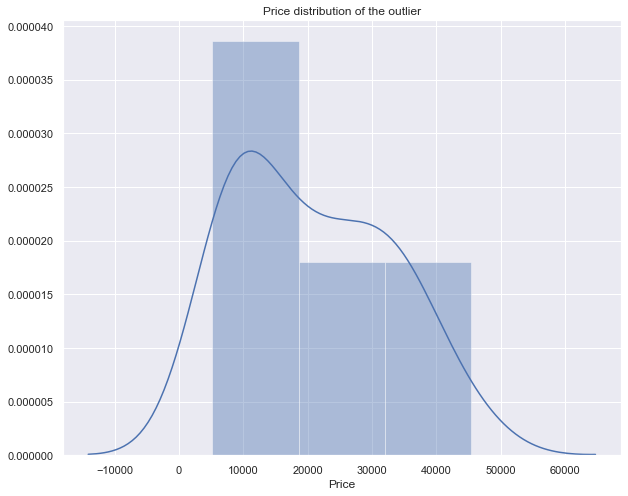

In [44]:
sns.distplot(data_row_outlier['Price'])
plt.title('Price distribution of the outlier')

## Question 2
From the describe, and few plots that I see it seems in our outlier based on the MPG-Differences that the car is quite big. Do you agree with my assumption? give me your reasoning

In [67]:
data_clean_outlier = df[((df['MPG-difference']>Q1_new) | (df['MPG-difference']<(Q3_new)))]

In [68]:
df_clean = pd.DataFrame(data = data_clean_outlier , columns = ['Make','MPG-difference','Highway-MPG','City-MPG'])

In [69]:
x_clean = df_clean.groupby('Make')['MPG-difference','Highway-MPG','City-MPG'].mean()
mpg1 = pd.DataFrame(x_clean, columns= ['MPG-difference','Highway-MPG','City-MPG'])
mpg1.sort_values(by=['MPG-difference','Highway-MPG','City-MPG'])

,MPG-difference,Highway-MPG,City-MPG
Make,,,
mercedes-benz,2.500000,21.000000,18.500000
jaguar,4.000000,18.333333,14.333333
peugot,4.181818,26.636364,22.454545
subaru,4.416667,30.750000,26.333333
volvo,4.636364,25.818182,21.181818
mercury,5.000000,24.000000,19.000000
isuzu,5.000000,29.000000,24.000000
honda,5.076923,35.461538,30.384615
audi,5.166667,24.500000,19.333333


In [57]:
df3 = pd.DataFrame(data = data_row_outlier , columns = ['Make','MPG-difference','Highway-MPG','City-MPG'])

In [58]:
x = df3.groupby('Make')['MPG-difference','Highway-MPG','City-MPG'].mean()
mpg = pd.DataFrame(x, columns= ['MPG-difference','Highway-MPG','City-MPG'])
mpg.sort_values(by=['MPG-difference','Highway-MPG','City-MPG'])

,MPG-difference,Highway-MPG,City-MPG
Make,,,
peugot,0.000000,25.000000,25.000000
subaru,0.500000,24.000000,23.500000
volvo,1.000000,27.000000,26.000000
mercedes-benz,2.500000,21.000000,18.500000
audi,3.000000,20.000000,17.000000
toyota,4.833333,36.833333,32.000000
mazda,5.666667,32.333333,26.666667
porsche,8.000000,25.500000,17.500000
volkswagen,9.000000,46.000000,37.000000


In [59]:
high = pd.DataFrame(x, columns= ['Highway-MPG',])
high.sort_values(by=['Highway-MPG'])

,Highway-MPG
Make,
audi,20.000000
mercedes-benz,21.000000
subaru,24.000000
peugot,25.000000
porsche,25.500000
volvo,27.000000
mazda,32.333333
toyota,36.833333
volkswagen,46.000000


In [60]:
city = pd.DataFrame(x, columns= ['City-MPG'])
city.sort_values(by=['City-MPG'])

,City-MPG
Make,
audi,17.000000
porsche,17.500000
mercedes-benz,18.500000
subaru,23.500000
peugot,25.000000
volvo,26.000000
mazda,26.666667
toyota,32.000000
volkswagen,37.000000


In [63]:
from scipy.stats import shapiro, anderson, skew, kurtosis
norr = []
for i in df3['Make'].unique():
    data1 = df3[df3['Make']==i]['MPG-difference']
    if anderson(data1)[1][2] < 0.05:
        norr.append('Not-Normal Distribution')
    else:
        norr.append('Normal Distribution')

res1 = pd.DataFrame(data = [list(df3['Make'].unique()), norr]).T
res1.columns = ['Columns', 'Normality test']
res1

,Columns,Normality test
0,audi,Not-Normal Distribution
1,mazda,Not-Normal Distribution
2,mercedes-benz,Normal Distribution
3,peugot,Not-Normal Distribution
4,porsche,Normal Distribution
5,subaru,Not-Normal Distribution
6,toyota,Normal Distribution
7,volkswagen,Not-Normal Distribution
8,volvo,Not-Normal Distribution


In [62]:
from pingouin import kruskal
kruskal(data=df3, dv='MPG-difference', between='Make')

,Source,ddof1,H,p-unc
Kruskal,Make,8,19.788,0.01117


In [72]:
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(data_row_outlier['MPG-difference'], data_clean_outlier['MPG-difference'])
print('stat={}, p={}'.format(stat, p))
if p > 0.05:
	print('fail to reject H0 / Equal')
else:
	print('reject H0 / Unequal')

stat=2120.5, p=0.009462613753198285
reject H0 / Unequal


- Berdasarkan tabel highway-mpg dan city-mpg, terlihat pemakaian bahan bakan di High way lebih hemat di bandingkan dengan di kota, dengan asumsi bahwa laju kendaraan di jalan tol konstan sehingga menghemat bahan bakar daripada di kota.
- Berdasarkan tes Normalitas dapat disimpulkan mayoritas Data Outliear Terdistribusi tidak Normal dan berdasarkan tes kruskal p-unc < 0.05 artinya Make dan Mpg Difference memiliki relation.
- Saya setuju dengan asumsi pada MPG-difference memiliki outlier yang tinggi dan menurut analisa saya itu disebabkan oleh kondisi jalan antara di kota dan di jalan tol. seperti terlihat pada contoh mobil porsche secara umum masuk kategori sport car, dimana pada tabel City-Mpg score nya 17.5 (masih terhitung Boros), sedangkan pada tabel highway_MPG scorenya 25.5, yang artinya mobil tidak cocok untuk jalan di perkotaan.
- Faktor mobil juga sangat memmpengaruhi MPG Difference, karena ada city car yang memang cocok di perkotaan dan sport car yang lebih cocok untuk di High way
- Berdasarkan Tes Mannwhitneyu menunjukkan ada perbedaan antara data Outlier dan clean outlier

## Analysis
We have try to cleaning some of the data that we have, and now we could try to done few analysis from the data we had. Try to answer this following question.

### Question
What do you think the feature that really affecting the price? give me your explanation with the data

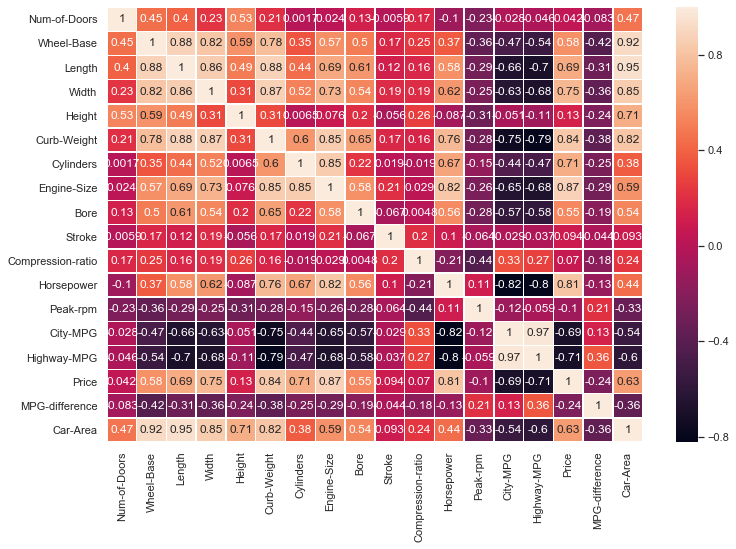

In [53]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, linewidths=.5)

In [54]:
categorical_columns = df.select_dtypes('object').columns
from scipy.stats import chi2_contingency
chi2_check = []
for i in categorical_columns:
    if chi2_contingency(pd.crosstab(df['Price'], df[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')

In [55]:
res_ = pd.DataFrame(data = [categorical_columns, chi2_check] 
             ).T 
res_.columns = ['Column', 'Hypothesis']
res_

,Column,Hypothesis
0,Make,Fail to Reject Null Hypothesis
1,Fuel-Type,Fail to Reject Null Hypothesis
2,Aspiration,Fail to Reject Null Hypothesis
3,Body-Style,Fail to Reject Null Hypothesis
4,Drive-Wheels,Fail to Reject Null Hypothesis
5,Engine-Location,Fail to Reject Null Hypothesis
6,Engine-Type,Fail to Reject Null Hypothesis
7,Fuel-System,Fail to Reject Null Hypothesis


In [65]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [66]:
import scipy.stats as ss
cramers = []
for i in categorical_columns:
    cramers.append(cramers_v(df['Price'], df[i]))

res4 = pd.DataFrame(data = [categorical_columns, cramers] 
             ).T 
res4.columns = ['Column', 'Cramers_V']
res4.sort_values(by = 'Cramers_V', ascending = False)

,Column,Cramers_V
5,Engine-Location,0.275939
2,Aspiration,0.243104
7,Fuel-System,0.223377
4,Drive-Wheels,0.192977
6,Engine-Type,0.191374
3,Body-Style,0.185159
0,Make,0.170321
1,Fuel-Type,0.142385


Berdasarkan korelasi heatmap diatas dapat disimpulkan feature yang sangat affecting terhadap price :
1. Engine-Size : 0.87 
2. Curb-Weight : 0.84
3. Horsepower  : 0.81
4. Width       : 0.75
5. Cylinder    : 0.71
6. Length      : 0.69

Berdasarkan korelasi Chi - squre menunjukkan data categorical tida ada perbedaan dan berdasarkan berdasarkan cramers_v menunjukkan ada sedikit korelasi


To create our dashboard, convert your cleaned data as CSV (Just name it as auto_imports_ujian.csv, and don't forget to not including the index) and then export it to your SQL database

In [56]:
# df = df.to_csv('auto_imports_ujian.csv',index=False)